In [1]:
# import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# simulation parameters
N = 55
nIterations = 1000

In [4]:
# the data and its mean
theData = np.random.normal(loc=0,scale=1,size=N)**2 - 1
theMean = np.mean(theData)

In [5]:
# one permutation test
permMeans = np.zeros(nIterations)
for permi in range(nIterations):

  # the data with random sign flips
  signFlippedData = np.sign(np.random.randn(N))*theData

  # and its mean
  permMeans[permi] = np.mean( signFlippedData )

In [6]:
# zscore relative to H0 distribution
zVal = (theMean-np.mean(permMeans)) / np.std(permMeans,ddof=1)
pVal = (1-stats.norm.cdf(np.abs(zVal)))*2     


In [7]:
# print the z/p values
print(f'z = {zVal:.2f}, p = {pVal:.3f}')


z = -0.47, p = 0.640


In [8]:
# simulation parameters 
N = 55
nPermTests = 750
nIterations = 1000

In [9]:
# data and mean
theData = np.random.normal(loc=0,scale=1,size=N)**2 - 1
theMean = np.mean(theData)


In [10]:
# initialize output vector
zVals = np.zeros(nPermTests)

In [11]:
# loop over all the permutation tests
for ni in range(nPermTests):

  # permutation testing 
  permMeans = np.zeros(nIterations)
  for permi in range(nIterations):
    permMeans[permi] = np.mean( np.sign(np.random.randn(N))*theData )

  # zscore relative to H0 distribution
  zVals[ni] = (theMean-np.mean(permMeans)) / np.std(permMeans,ddof=1)


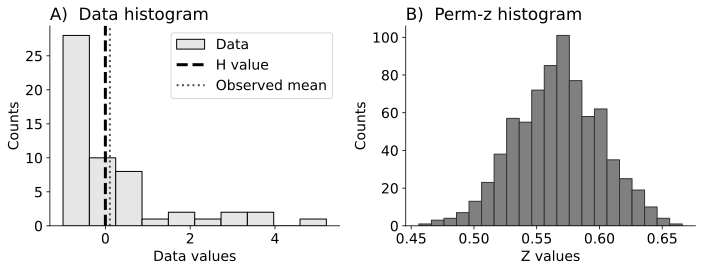

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].hist(theData,bins='fd',color=(.9,.9,.9),edgecolor='k',label='Data')
axs[0].axvline(x=0,color='k',linestyle='--',linewidth=3,label=r'H value')
axs[0].axvline(x=theMean,color=(.3,.3,.3),linestyle=':',linewidth=2,label='Observed mean')
axs[0].set(xlabel='Data values',ylabel='Counts')
axs[0].legend()
axs[0].set_title(r'A)  Data histogram')

axs[1].hist(zVals,bins='fd',color=(.5,.5,.5),edgecolor=(.2,.2,.2))
axs[1].set(xlabel='Z values',ylabel='Counts')
axs[1].set_title(r'B)  Perm-z histogram')

# display the figure
plt.tight_layout()
plt.show()

# Exe 2

In [13]:
# create non-normal data
N = 100
data = np.random.uniform(low=-1,high=1,size=N)
data -= np.mean(data)
h0val = -.11

In [14]:
# other simulation parameters
nPerms = 1000
numPermTests = 1000

In [15]:
# permutation testing
data4perm = data - h0val
obsMean = np.mean(data4perm)

In [16]:
# initialize output variables
permMeans = np.zeros(nPerms)
pvals = np.zeros(numPermTests)

In [17]:
# the 'outer loop' over many permutation tests
for permRepeati in range(numPermTests):

  # permutation test
  for permi in range(nPerms):
    randSigns = np.sign(np.random.randn(N))
    permMeans[permi] = np.mean( randSigns*data4perm )

  # compute and store the p-value
  pvals[permRepeati] = np.mean( np.abs(permMeans) > np.abs(obsMean) )

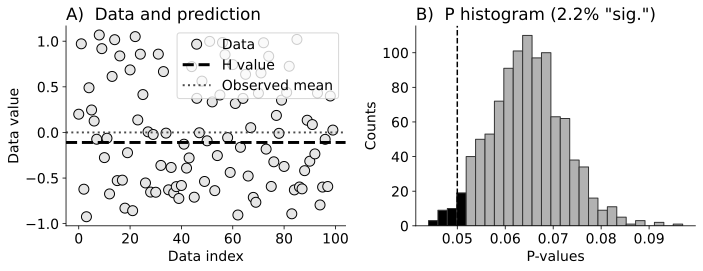

In [18]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(data,'ko',markerfacecolor=(.9,.9,.9),markersize=10,label='Data')
axs[0].axhline(y=h0val,color='k',linestyle='--',linewidth=3,label=r'H value')
axs[0].axhline(y=0,color=(.3,.3,.3),linestyle=':',linewidth=2,label='Observed mean')
axs[0].set(xlabel='Data index',ylabel='Data value')
axs[0].legend(loc='upper right')
axs[0].set_title(r'A)  Data and prediction')

h = axs[1].hist(pvals,bins='fd',color=(.7,.7,.7),edgecolor=(.2,.2,.2))
axs[1].set(xlabel='P-values',ylabel='Counts')
axs[1].set_title(r'B)  P histogram ' + f'({np.mean(pvals<.05)*100:.1f}% "sig.")')
axs[1].axvline(x=.05,color='k',linestyle='--')

# paint bars black if "significant"
for p in h[2]:
  if p.get_x()<.05: p.set_facecolor('k')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [19]:
# data parameters
n1,n2 = 50,70

In [20]:
# experiment parameters
nIterations = 1000 
numRepeats = 541 


In [21]:
# initializations
permvals = np.zeros(nIterations)
truelabels = np.concatenate((np.ones(n1), 2*np.ones(n2)))
pvals = np.zeros((numRepeats,2))

In [22]:
# run the experiment
for expi in range(numRepeats):

  # create new data
  data1 = np.random.randn(n1,1)
  data2 = np.random.randn(n2,1) + .3  

  # pool the data into one variable 
  alldata = np.concatenate((data1, data2))
  true_conddif = np.mean(alldata[truelabels==1]) - np.mean(alldata[truelabels==2])

  # creating a null-hypothesis (H0) distribution
  for permi in range(nIterations):
    shuflabels = np.random.permutation(truelabels)
    permvals[permi] = np.mean(alldata[shuflabels==1]) - np.mean(alldata[shuflabels==2])

  # p_z
  zVal = (true_conddif-np.mean(permvals)) / np.std(permvals,ddof=1)
  pvals[expi,0] = (1-stats.norm.cdf(np.abs(zVal)))*2 # two-tailed!

  # p_c
  pvals[expi,1] = np.sum(np.abs(permvals)>np.abs(true_conddif)) / nIterations

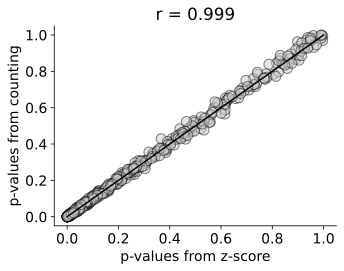

In [23]:
# plot
plt.figure(figsize=(5,4))
plt.plot(pvals[:,0],pvals[:,1],'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.5)
plt.plot([0,1],[0,1],'k')
plt.xlabel('p-values from z-score')
plt.ylabel('p-values from counting')
plt.title(f'r = {np.corrcoef(pvals.T)[0,1]:.3f}',loc='center')

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [24]:
nPerms = 1000
permMeans = np.zeros(nPerms)

In [25]:
N = 30
h0val = .5
pvals = np.zeros((100,2))


In [26]:
# loop over the experiment iterations
for iter in range(100):

  # create the data (shifted by h0 such that H0=0)
  X = np.random.randn(N)**1 - h0val

  # permutation testing
  permMeans = np.zeros(nPerms)
  for permi in range(nPerms):
    permMeans[permi] = np.mean( np.random.choice((-1,1),N)*X )


  # p-value from permutation testing
  pvals[iter,0] = np.mean( np.abs(permMeans)>np.abs(np.mean(X)) )

  # p-value from 1-sample ttest
  pvals[iter,1] = stats.ttest_1samp(X,0).pvalue

In [27]:
# replace p=0 with p=min
pvals[pvals==0] = np.min(pvals[pvals>0])
pvals = np.log(pvals)

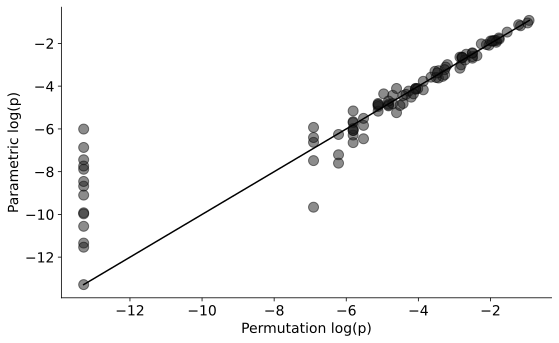

In [28]:
# plot
plt.figure(figsize=(8,5))
plt.plot(pvals[:,0],pvals[:,1],'ko',
         markersize=10,markerfacecolor=(.1,.1,.1),alpha=.5)
prange = [ np.min(pvals),np.max(pvals) ] # min/max p-values for the unity line
plt.plot([prange[0],prange[1]],[prange[0],prange[1]],'k')
plt.xlabel('Permutation log(p)')
plt.ylabel('Parametric log(p)')

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [29]:
# simulation parameters
N = 30
nPerms = 1000
stdevs = np.linspace(.1,2,20)

In [30]:
# initializations
permMeans = np.zeros(nPerms)
results = np.zeros((len(stdevs),3))
H0dists = [0]*2

In [31]:
# run the experiment
for si,s in enumerate(stdevs):

  # create the data
  data = np.random.normal(.2,s,size=N)

  # permutation testing
  for permi in range(nPerms):
    permMeans[permi] = np.mean( np.random.choice((-1,1),N)*data )

  # store the t/z values
  results[si,0] = (np.mean(data)-np.mean(permMeans)) / np.std(permMeans,ddof=1)
  results[si,1] = stats.iqr(permMeans)
  results[si,2] = stats.ttest_1samp(data,0).statistic

  # store the extremiest H0 distributions
  if si==0:
    H0dists[0] = permMeans+0 # +0 makes a copy
  elif si==(len(stdevs)-1):
    H0dists[1] = permMeans

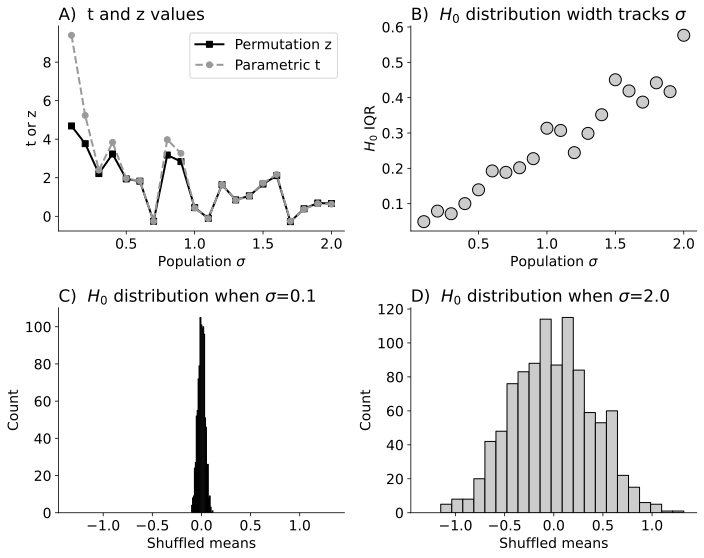

In [32]:
## plot
_,axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(stdevs,results[:,0],'ks-',linewidth=2,label='Permutation z')
axs[0,0].plot(stdevs,results[:,2],'--o',color=(.6,.6,.6),linewidth=2,label='Parametric t')
axs[0,0].legend()
axs[0,0].set(xlabel=r'Population $\sigma$',ylabel='t or z')
axs[0,0].set_title(r'A)  t and z values')

axs[0,1].plot(stdevs,results[:,1],'ko',markerfacecolor=(.8,.8,.8),markersize=12)
axs[0,1].set(xlabel=r'Population $\sigma$',ylabel=r'$H_0$ IQR')
axs[0,1].set_title(r'B)  $H_0$ distribution width tracks $\sigma$')

# histograms of the H0 distributions
axs[1,0].hist(H0dists[0],bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1,0].set_title(r'C)  $H_0$ distribution when $\sigma$=' + str(stdevs[0]))
axs[1,1].hist(H0dists[1],bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1,1].set_title(r'D)  $H_0$ distribution when $\sigma$=' + str(stdevs[-1]))

for a in axs[1,:]:
  a.set(xlabel='Shuffled means',ylabel='Count',xlim=np.array([-1.1,1.1])*np.max(np.abs(H0dists[1])))

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [33]:
# simulation parameters
N = 30
nPerms = 1000
stdevs = np.linspace(.1,2,20)

In [34]:
# initializations
permMeans = np.zeros(nPerms)
results = np.zeros((len(stdevs),3))
H0dists = [0]*2

In [35]:
# run the experiment
for si,s in enumerate(stdevs):

  # create the data
  data = np.random.normal(.2,s,size=N)

  # permutation testing
  for permi in range(nPerms):
    permMeans[permi] = np.mean( np.random.choice((-1,1),N)*data )

  # store the t/z values
  results[si,0] = (np.mean(data)-np.mean(permMeans)) / np.std(permMeans,ddof=1)
  results[si,1] = stats.iqr(permMeans)
  results[si,2] = stats.ttest_1samp(data,0).statistic

  # store the extremiest H0 distributions
  if si==0:
    H0dists[0] = permMeans+0 # +0 makes a copy
  elif si==(len(stdevs)-1):
    H0dists[1] = permMeans


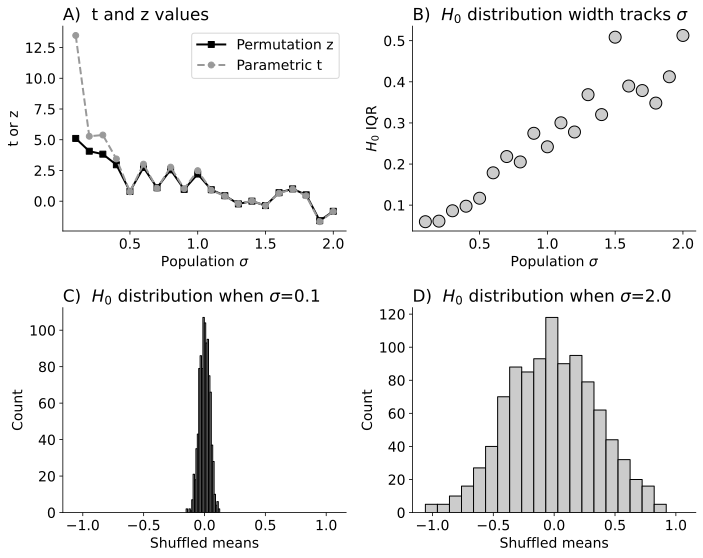

In [36]:
# plot
_,axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(stdevs,results[:,0],'ks-',linewidth=2,label='Permutation z')
axs[0,0].plot(stdevs,results[:,2],'--o',color=(.6,.6,.6),linewidth=2,label='Parametric t')
axs[0,0].legend()
axs[0,0].set(xlabel=r'Population $\sigma$',ylabel='t or z')
axs[0,0].set_title(r'A)  t and z values')

axs[0,1].plot(stdevs,results[:,1],'ko',markerfacecolor=(.8,.8,.8),markersize=12)
axs[0,1].set(xlabel=r'Population $\sigma$',ylabel=r'$H_0$ IQR')
axs[0,1].set_title(r'B)  $H_0$ distribution width tracks $\sigma$')

# histograms of the H0 distributions
axs[1,0].hist(H0dists[0],bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1,0].set_title(r'C)  $H_0$ distribution when $\sigma$=' + str(stdevs[0]))
axs[1,1].hist(H0dists[1],bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1,1].set_title(r'D)  $H_0$ distribution when $\sigma$=' + str(stdevs[-1]))

for a in axs[1,:]:
  a.set(xlabel='Shuffled means',ylabel='Count',xlim=np.array([-1.1,1.1])*np.max(np.abs(H0dists[1])))

# display the figure
plt.tight_layout()
plt.show()
     